# Sample statistics

This notebook demonstrates some of the properties of common statistical measures applied to sample data.

## **Data** = Observations, measurements etc.

   Usually have complicated relationship to what you're really interested in, and have errors and uncertainties.
    
## **Statistics** = Any function of the data

   So for a data set that consists of a set of values $\mathbf{x} = x_1, x_2, x_3 , ..., x_n$ we have

   e.g. number of data points $n$, mean value ($x_1$ + $x_2$ + $x_3$+...+
  $x_n$)/$n$, largest value $x_{max}$
    
   N.B. Some statistics are more useful than others.
   
   
  If the data can be assumed to be independant outcomes of some random experiment, then we can characterise the underlying process (and its probability distribution function) by means of various statistics computed from $x_1, x_2, x_3 , ..., x_n$.

  Statistics have associated **sampling distributions** which describe their distribution under many repetitions of the experiment.
  
## Estimators

An **estimator** is a statistic used to estimate/calculate a true, underlying parameter. For example, the mean of a population can be estimated by taking a random subsample and calculating its mean.

In a frequentist context, it is often desirable to choose estimators that are **unbiased,** i.e., if you repeat an experiment a large number of times, the expectation of the estimator is equal to the true value of the parameter you are estimating. For example, the sample mean is (usually) an unbiased estimator of the population mean, if your sample has been selected in a fully random manner.

We see below that the naïve estimator for the variance is not actually unbiased.

Frequentist statistics often relies on calculating the distribution of the estimator if we imagine multiple repetitions of the experiment.

Some other desiderata of estimators: note that it is often not possible to find estimators that simultaneously satisfy all of these criteria (e.g., both efficiency and lack of bias):
 - **Consistency:** The estimator converges to the parameter value in the limit of large sample size.
 - **Asymptotic normality:** The distribution of the estimator converges to a normal distribution in the limit of large sample size (this often makes analytical derivations more straightforward).
 - **Efficiency:** The distribution of the estimator has a low variance (approaching the **Cramér–Rao bound** which relates the minimum variance of an estimator to the **Fisher information matrix,** the matrix of second-order derivatives of the likelihood function).
 - **Robustness:** The estimator is insensitive to the presence of outliers, and/or to the use on data following a wide range of distributions (especially those with high kurtosis/heavy tails).

## Location & Scale


For *univariate* data $x_1,x_2,x_3,...,x_n$ (i.e. for a single random variable) the two most important kinds of descriptive statistics are 

**Location** - where are the data? (e.g. sample mean)

**Scale** *(a.k.a. dispersion)* -  how much are they spread out? (e.g. sample standard deviation).
<img src="./LocationScale.png" alt="Loc" width="300"/>

##### Imports and helper functions for this notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import scipy.stats
plt.rcParams['xtick.minor.visible'], plt.rcParams['xtick.top'] = True,True 
plt.rcParams['ytick.minor.visible'], plt.rcParams['ytick.right'] = True,True 
plt.rcParams['xtick.direction'], plt.rcParams['ytick.direction'] = 'in','in' 

In [2]:
plt.rcParams['font.size'] = 14

In [3]:
def plotSampleMeanStandardDeviation(m,s,ylim_m=None,ylim_s=None,mExpected=0.,sExpected=1.,
                                    ylab1='Sample mean (m)', 
                                    ylab2='Sample standard deviation (s)',
                                    SeeThrough=False) :
    '''Function that plots (previously found) running sample mean and standard deviation for three cases
    
    Inputs m & s must be 3 by N arrays, where N is larger than 10'''
    plt.gcf().set_size_inches((10,4))
    plt.subplot(121)
    npoints = len(m[0,:])
    #x axis
    n = np.arange(1,npoints+1)
    nPlot = n[9:]
    # valus to plot (exclude first 10 values)
    mPlot = m[:,9:]
    sPlot = s[:,8:]
    # Allowing for semi-transparent lines, plot means
    if SeeThrough :
        plt.plot(nPlot,mPlot.T,alpha=0.1,c='k')
    else :
        plt.plot(nPlot,mPlot.T)
    # plot expected reduction in spread
    plt.plot(nPlot,mExpected+1./np.sqrt(nPlot),'k--')
    plt.plot(nPlot,mExpected-1./np.sqrt(nPlot),'k--')
    if ylim_m is not None :
        plt.ylim(ylim_m)
    plt.xscale('log')
    plt.xlim(10,npoints)
    plt.xlabel('Sample size (n)')
    plt.ylabel(ylab1)
    
    plt.subplot(122)
    if SeeThrough :
        plt.plot(nPlot,sPlot.T,alpha=0.1,c='k')
    else :
        plt.plot(nPlot,sPlot.T)
    plt.plot(nPlot,sExpected+sExpected/np.sqrt(2*(nPlot-1)),'k--')
    plt.plot(nPlot,sExpected-sExpected/np.sqrt(2*(nPlot-1)),'k--')
    if ylim_s is not None :
        plt.ylim(ylim_s)
    plt.xscale('log')
    plt.xlim(10,npoints)
    plt.xlabel('Sample size (n)')
    plt.ylabel(ylab2)
    plt.tight_layout()

# Sample mean and sample standard deviation

Given n data points $x_1,x_2,x_3,...,x_n$, the sample mean is 

\begin{equation}
m = \frac{1}{n} \sum_{i=1}^n x_i
\end{equation}

and (for n>1) the sample standard deviation is

\begin{equation}
s = \sqrt{\frac{1}{n-1} \sum_{i=1}^n (x_i-m)^2}
\end{equation}

The use of a factor 1/(n-1) rather than 1/n is known as Bessel's correction and makes the sample variance an unbiased estimate of the population variance, i.e. $E(s^2) = \sigma^2$, and thus $E(s) \approx \sigma$. Note that constructing an unbiased estimate of the standard deviation itself is considerably harder...



If the population variance is finite, then both m and s improve as estimates roughly like $n^{-1/2}$, or more accurately, for a Normal distribution, we expect dispersions (standard deviations) of m & s:

\begin{equation}
D[m] =  \sigma/\sqrt{n} \approx  s/\sqrt{n}
\end{equation}

(We will demonstrate this mathematically using 'characteristic functions' in a future lecture)

\begin{equation}
D[s] \approx  \sigma/\sqrt{2(n-1)} \approx  s/\sqrt{2(n-1)} 
\end{equation}


# We can now demonstrate this...

## Convergence of sample mean (m) and sample standard deviation (s) for Normal distribution

We sample $10^4$ points from N(0,1) and compute m & s from the first n points. Plot this as a function of n. And repeat for a few dozen samples

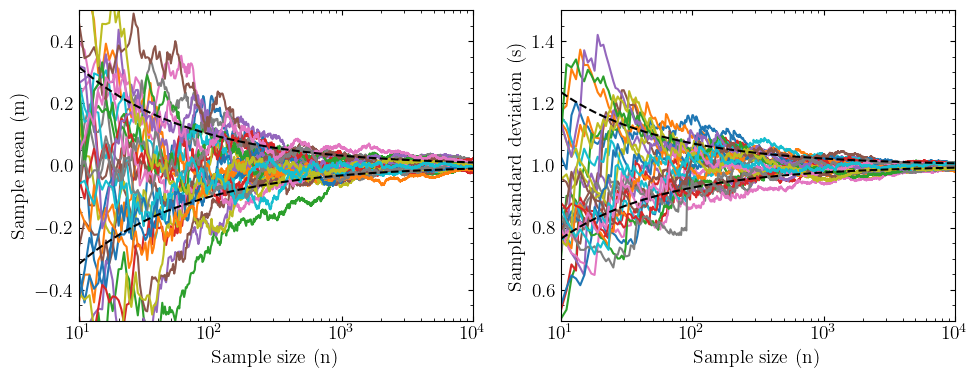

In [4]:
npoints = 10000
#Sample from Normal distribution
d1 = np.random.randn(30,npoints)
#counter
n = np.arange(1,npoints+1)

# Calculate running mean
m = np.cumsum(d1,axis=1)/n

# Calculate running standard deviation
CumulativeDeviationSq = np.sqrt(np.cumsum((d1-m)**2,axis=1))
s = CumulativeDeviationSq[:,1:]/np.sqrt(n[1:]-1)
plotSampleMeanStandardDeviation(m,s,ylim_m=(-0.5,0.5),ylim_s=(0.5,1.5),mExpected=0.)
plt.show()

# The dashed lines indicate our expectations based on the above formulae

The dashed lines indicate our expectations based on the above formulae

# We can do the same for the exponential distribution - E(1)

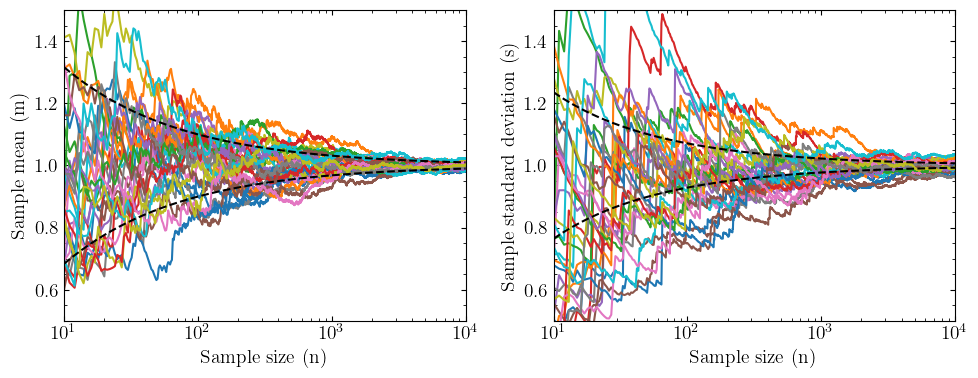

In [5]:
npoints = 10000
# sample from Exponential distribution
d1 = np.random.standard_exponential((30,npoints))

n = np.arange(1,npoints+1)

# Calculate means & Std Devs
m = np.cumsum(d1,axis=1)/n
CumulativeDeviationSq = np.sqrt(np.cumsum((d1-m)**2,axis=1))
s = CumulativeDeviationSq[:,1:]/np.sqrt(n[1:]-1)
#plot
plotSampleMeanStandardDeviation(m,s,ylim_m=(0.5,1.5),ylim_s=(0.5,1.5),mExpected=1.)

plt.show()

Same behaviour, converging proportional to $\sqrt{n}$

# In fact this works for any distribution with finite variance.

### So what if we try a population with an infinite variance (e.g Cauchy)?

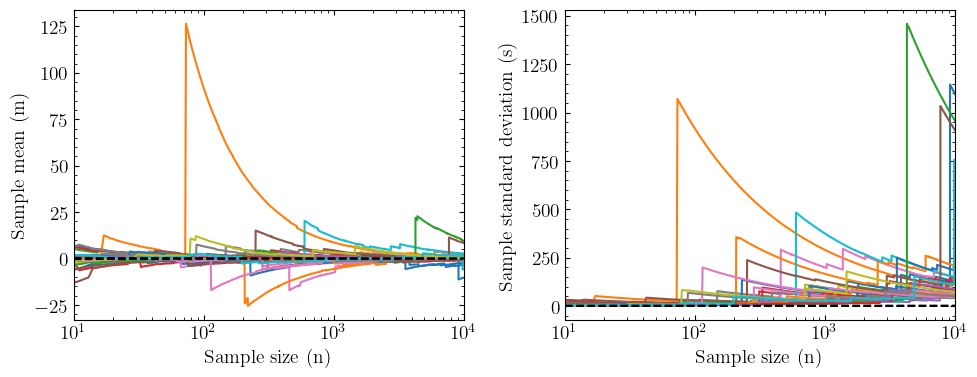

In [6]:
npoints = 10000
# Sample from Cauchy distribution
d1 = np.random.standard_cauchy((30,npoints))

n = np.arange(1,npoints+1)

# Calculate means & Std Devs
m = np.cumsum(d1,axis=1)/n
CumulativeDeviationSq = np.sqrt(np.cumsum((d1-m)**2,axis=1))
s = CumulativeDeviationSq[:,1:]/np.sqrt(n[1:]-1)
# plot
plotSampleMeanStandardDeviation(m,s,mExpected=0.)


plt.show()

### No convergence for the mean, divergence for the standard deviation





# Order statistics

Sample mean and standard deviation are very sensitive to outliers.

But **any function of the data is a statistic** and we can chose to describe location and scale of the data in a way which is more robust to outliers than the mean and the standard deviation.

The most common methods are based on order statistics.

We order the data in a non decreasing sequence:

$x_{(1)} \leq x_{(2)} \leq ... \leq x_{(n)}$

The $k$th order statistic is the $k$th smallest value, $x_{(k)}$.

These are usually used in the form of *quantiles*, Q, (often refered to as percentiles) some of which have special names (e.g., median).


## Calculating quantiles

There are many ways to define the quantiles. I recommend that to calculate, say, the 0.5-quantile, Q(0.5) (a.k.a the 50th percentile, a.k.a. the median)

Let $p=0.5$ (so this is a general solution)

Compute $k = \lfloor (n+1)p\rfloor$ and $h = (n+1)p-k$

We then have $Q(p) = (1-h)x_{(k)} + h x_{(k-1)}$

Note that for $p=0.5$, $h$ will be 0 or 0.5

And that this only works if $1/(n+1) \leq p \leq n/(n+1)$ - otherwise one must return the lowest or highest value in the list as the relevant percentile (as appropriate).

It is often the case that the quantiles you're interested in don't have an exact match with a given number of datapoints, hence why we do the above interpolation. Numpy has several methods for handling this: see the docs if you are interested.

## Special names/uses of quantiles

Q(0.5) = median (or 50th percentile)

Q(0.25) = lower quartile (or 25th percentile)

Q(0.75) = upper quartile (or 75th percentile)

Q(0.1) = first decile, Q(0.2) = second decile, etc

The interquartile range IQR = Q(0.75) – Q(0.25) is sometimes used as a measure of
dispersion. For a normal distribution it is equal to 1.35σ.

Half the intersextile range [Q(5/6) – Q(1/6)]/2 may also be useful. For a normal
distribution it is equal to 0.97σ.

The Gaia community often uses the robust scatter estimate
RSE = 0.390152 × [Q(0.9) – Q(0.1)]. For a normal distribution, RSE $=\sigma$


In [7]:
def draw_quantile(y,x,label) :
    plt.vlines(x,ymin=0.,ymax=y,colors='k')
    plt.hlines(y,xmin=0.,xmax=x,colors='k')
    print(label)

## Example: quantiles of a sample from the exponential distribution

median = 1.00
lower quartile = 0.41
upper quartile = 2.14
95th percentile = 4.60


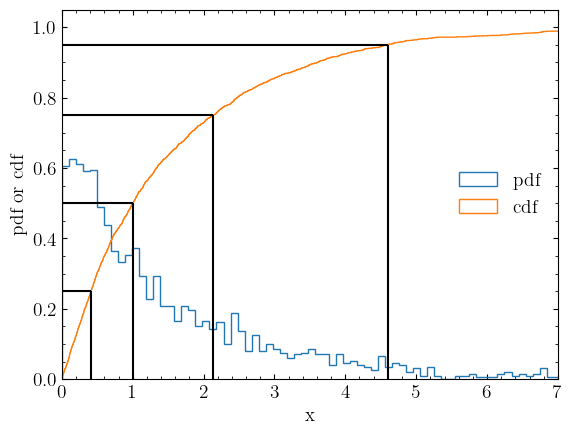

In [8]:
# Example quantiles
example_for_quantiles = np.random.exponential(scale=1.5,size=2000)
plt.hist(example_for_quantiles,bins=100,density=True, 
         histtype='step',label='pdf')
plt.hist(example_for_quantiles,bins=5000,density=True,
         cumulative=True, histtype='step',label='cdf')
plt.xlim(0,7)
plt.xlabel('x')
plt.ylabel('pdf or cdf')
plt.legend(frameon=False,loc='center right')

# Note that I use numpy percentile to find these
median,lQ,uQ,reject = np.percentile(example_for_quantiles,[50,25,75,95])
draw_quantile(0.5,median,'median = %.2f' % median)
draw_quantile(0.25,lQ,'lower quartile = %.2f' % lQ)
draw_quantile(0.75,uQ,'upper quartile = %.2f' % uQ)
draw_quantile(0.95,reject,'95th percentile = %.2f' % reject)

plt.show()

# NB quantiles is one case where it's easier to read off from the cdf rather than the pdf

## Median and interquartile range for the Cauchy distribution 

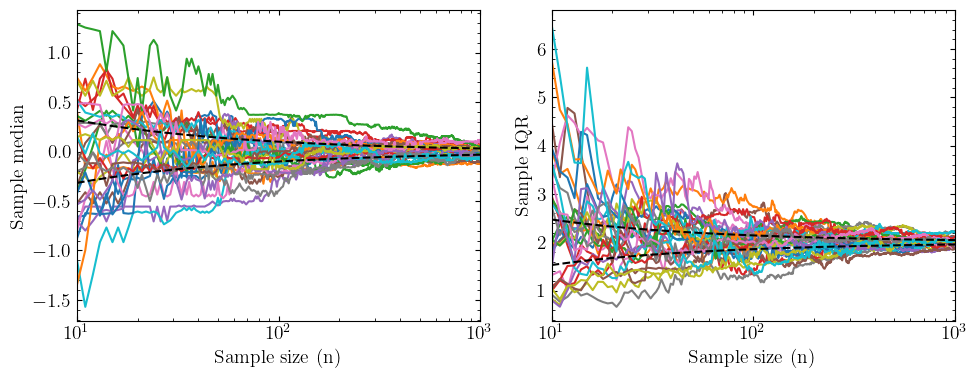

In [9]:
npoints = 1000
n_eg = 30
d1 = np.random.standard_cauchy((n_eg,npoints))

n = np.arange(1,npoints+1)
m = np.zeros((n_eg,npoints))
s = np.zeros((n_eg,npoints))
percentiles = np.zeros((n_eg,n_eg,npoints))

for i in range(npoints) :
    m[:,i] = np.median(d1[:,0:i+1],axis=1)
    percentiles = np.percentile(d1[:,0:i+1],[25,50,75],axis=1)
    m[:,i] = percentiles[1,:]
    s[:,i] =  percentiles[2,:] - percentiles[0,:]
    

plotSampleMeanStandardDeviation(m,s[:,1:],mExpected=0.,sExpected = 2.,
                                ylab1='Sample median',ylab2='Sample IQR')


plt.show()

# Quantiles of the normal distribution

In [10]:
def show_N_sigma_region(N) :
    '''Function to illustrate the percentage of Gaussian pdf in a sigma range
    
    Only works for integers'''
    
    if N == 1 :
        x1 = np.linspace(-N,N)
        plt.fill_between(x1,RV.pdf(x1),color='C%d' % (N-1),alpha=0.5)
    else :
        x1 = np.linspace(-N,-N+1)
        plt.fill_between(x1,RV.pdf(x1),color='C%d' % (N-1),alpha=0.5)
        x1 = np.linspace(N-1,N)
        plt.fill_between(x1,RV.pdf(x1),color='C%d' % (N-1),alpha=0.5)
    
    plt.text(0,0.6-0.05*N,
             s='%d percent within %d sigma' % (100.*(RV.cdf(N)-RV.cdf(-N)),N),
             horizontalalignment='center',color='C%d' % (N-1))


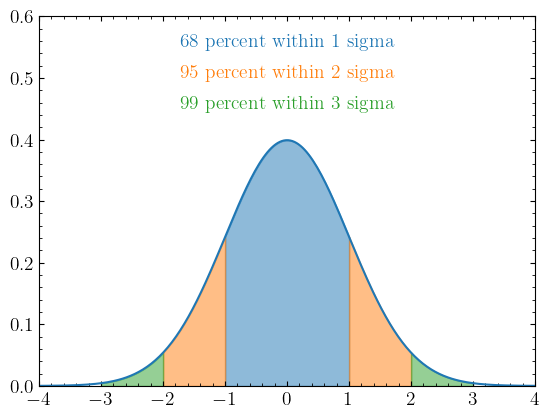

In [11]:
import scipy.stats
RV = scipy.stats.norm(loc=0,scale=1)
x = np.linspace(-5,5,300)
plt.plot(x,RV.pdf(x))
plt.xlim(-4,4)
plt.ylim(0,0.6)
show_N_sigma_region(1)
show_N_sigma_region(2)
show_N_sigma_region(3)
plt.show()

1-$\sigma$ error bars are common in astrophysics. Here are some toy examples for something trying to measure a single value (which is zero)

What's wrong with them?

In [12]:
# Deliberately unclear code so you can't see what I've done.
x = np.arange(1,20.1)
y1,y1err = np.random.randn(20),0.5*np.ones(20)
y2,y2err = np.random.randn(20),np.ones(20)
y3,y3err = 0.5*np.random.randn(20),np.ones(20)
def plot_toy_errors(x,y,ye,ax) :
    '''For simple illustration'''
    ax.errorbar(x,y,ye,fmt='x')
    ax.set_ylim(-3,3)
    ax.hlines(0,0,20,linestyles='dashed')
    ax.set_xlabel('measurement')
    return

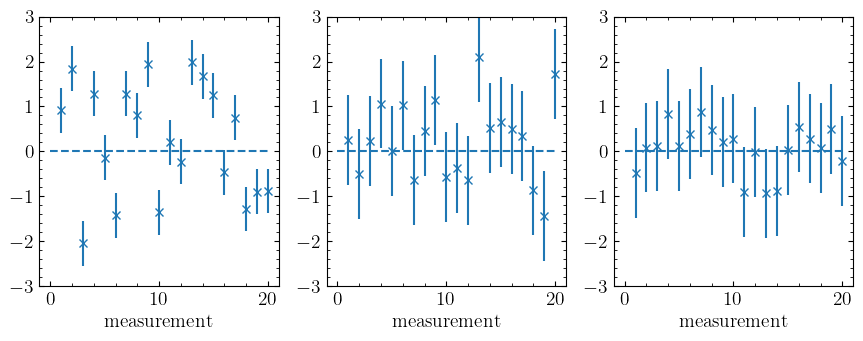

In [13]:
fig,ax = plt.subplots(1,3,figsize=(10.5,3.5))
plot_toy_errors(x,y1,y1err,ax[0])
plot_toy_errors(x,y2,y2err,ax[1])
plot_toy_errors(x,y3,y3err,ax[2])
plt.show()

# The 1-$\sigma$ error bar should contain the true value 68% of the time.
## In the above examples, they do far less (left) or far more (right). Something is wrong in either case.

This is something you are likely to find in real studies, and is something that lets you know that something is not as it seems.


# Finally...

Sample statistics condense possibly large datasets down to a small number of numbers.

This necessarily throws away information.

(OK, mathematically you can make a bijection between $\mathbb{R}^n$ and $\mathbb{R}$, but that won't be a useful function...).

It is possible to construct datasets that share a number of sample statistics but look very different to the human eye.

See Anscomb's Quartet and the Datasaurus Dozen at https://www.research.autodesk.com/publications/same-stats-different-graphs/

You should always make as many plots as you can when you analyse a new dataset! Most won't make it into a report/presentation/thesis/publication, but you need to check you're not missing anything by just trusting the summary statistics. You may overlook anything from a crucial problem with the dataset, to a genuine physical effect.